In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv(r"C:\Users\iat\Downloads\CustomerSegmentation\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\iat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


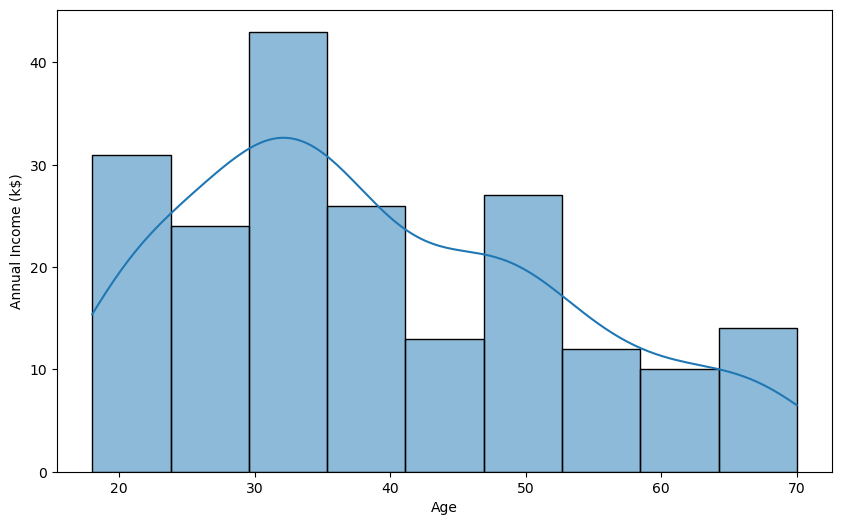

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

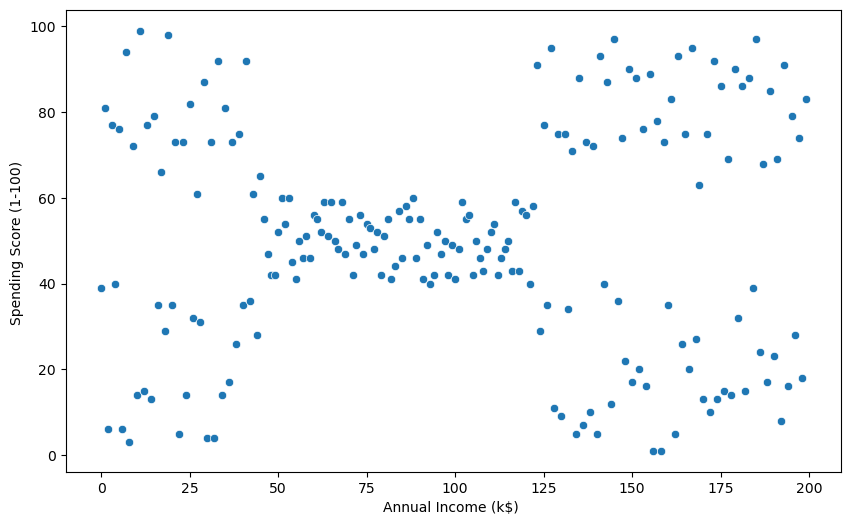

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Spending Score (1-100) ')
plt.show()

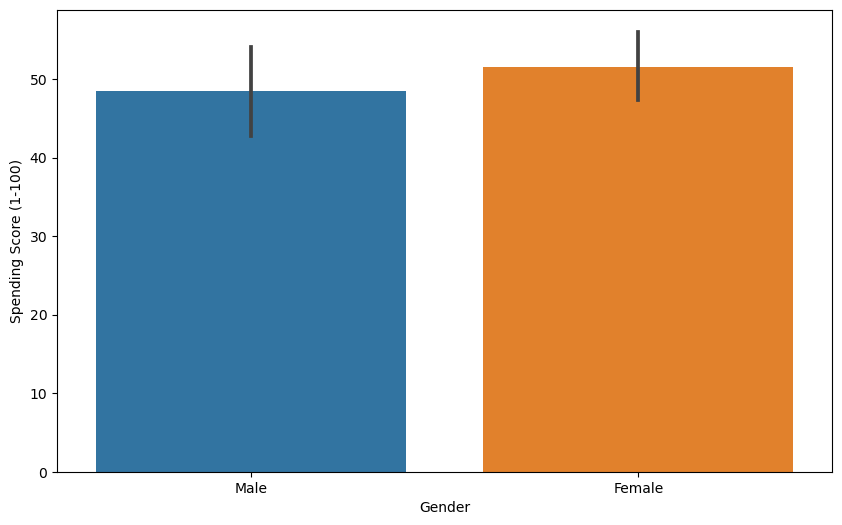

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [12]:
data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [13]:
x=data.drop('Annual Income (k$)',axis=1)
y=data['Annual Income (k$)']
print(x.head())
print(y.head())

   CustomerID  Gender  Age  Spending Score (1-100)
0           1       0   19                      39
1           2       0   21                      81
2           3       1   20                       6
3           4       1   23                      77
4           5       1   31                      40
0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (160, 4)
x_test : (40, 4)
y_train : (160,)
y_test : (40,)


In [16]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 24.60240797,  92.67719137,  64.55909103,  60.39512858,
        95.29064755,  98.19717689,  17.91639639,  81.98323592,
        22.14021172,  84.69092782,  43.0546832 ,  72.02634068,
        97.05899531,  85.67481316,  52.47778048,  18.76283149,
        30.29920738,  74.8850316 ,  32.48768055,  49.84488979,
        97.99013482,  80.8215641 ,  35.97731346,  87.29395367,
        43.7703128 ,  71.21559186,  96.28504534,  98.8366781 ,
        70.9640584 ,  36.25519816,  23.32665294,  41.05940531,
        83.74466697,  65.5578015 ,  26.39910357, 100.85847149,
        73.95468291,  17.82336415,  53.63984746,  64.40563543])

In [17]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [ 0.44923175  0.03736704  0.02292206 -0.00416391]
Intercept: 14.995810975742515


In [18]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mse

12.283085946638076

In [19]:
error=y_test-y_pred
error

18    -1.602408
170   -5.677191
107   -1.559091
98     0.604871
177   -7.290648
182   -0.197177
5     -0.916396
146   -4.983236
12    -2.140212
152   -6.690928
61     2.945317
125   -2.026341
180   -0.058995
154   -7.674813
80     1.522220
7     -0.762831
33     2.700793
130   -3.885032
37     1.512319
74     4.155110
183    0.009865
145   -3.821564
45     3.022687
159   -9.293954
60     2.229687
123   -2.215592
179   -3.285045
185    0.163322
122   -1.964058
44     2.744802
16    -2.326653
55     1.940595
150   -5.744667
111   -2.557801
22    -1.399104
189    2.141529
129   -2.954683
4     -0.823364
83     0.360153
106   -1.405635
Name: Annual Income (k$), dtype: float64